In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import squarify
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from scipy import stats
print(pd.__version__)

2.0.2


In [2]:
df = pd.read_csv('uber_nyc_enriched.csv', delimiter=';', index_col=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False) 
df.head(10)

borough  pickups spd vsb temp dewp     slp  pcp01  pcp06 pcp24 sd hday pickup_dt (M/Y)
pickup_dt                                                                                                    
01/01/2015 1:00          Bronx      152   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
01/01/2015 1:00       Brooklyn     1519   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
01/01/2015 1:00            EWR        0   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
01/01/2015 1:00      Manhattan     5258   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
01/01/2015 1:00         Queens      405   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
01/01/2015 1:00  Staten Island        6   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
01/01/2015 1:00            NaN        4   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
01/01/2015 2:00          Bronx      120   3  10   30    6  1023.0    0.0    0.0     0  0    Y         01/2015
01/01/2015 2:00       Brooklyn     1229   3  10   30    6  1023.0    0.0    0.0     0  0    Y         01/2015
01/01/2015 2:00            EWR        0   3  10   30    6  1023.0    0.0    0.0     0  0    Y         01/2015

Data preprocessing

In [3]:
df = pd.read_csv('uber_nyc_enriched.csv', keep_default_na=False, delimiter=';')
df

pickup_dt        borough  pickups spd vsb temp dewp     slp  pcp01  pcp06 pcp24 sd hday pickup_dt (M/Y)
0       01/01/2015 1:00          Bronx      152   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
1       01/01/2015 1:00       Brooklyn     1519   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
2       01/01/2015 1:00            EWR        0   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
3       01/01/2015 1:00      Manhattan     5258   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
4       01/01/2015 1:00         Queens      405   5  10   30    7  1023.5    0.0    0.0     0  0    Y         01/2015
...                 ...            ...      ...  ..  ..  ...  ...     ...    ...    ...   ... ..  ...             ...
29096  30/06/2015 23:00            EWR        0   7  10   75   65  1011.8    0.0    0.0     0  0    N         06/2015
29097  30/06/2015 23:00      Manhattan     3828   7  10   75   65  1011.8    0.0    0.0     0  0    N         06/2015
29098  30/06/2015 23:00         Queens      580   7  10   75   65  1011.8    0.0    0.0     0  0    N         06/2015
29099  30/06/2015 23:00  Staten Island        0   7  10   75   65  1011.8    0.0    0.0     0  0    N         06/2015
29100  30/06/2015 23:00             NA        3   7  10   75   65  1011.8    0.0    0.0     0  0    N         06/2015

[29101 rows x 14 columns]

In [5]:
df['spd'] = pd.to_numeric(df['spd'], errors='coerce')
df = df.dropna(subset = ['spd'])

df['vsb'] = pd.to_numeric(df['vsb'], errors='coerce')
df = df.dropna(subset = ['vsb'])

df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df = df.dropna(subset = ['temp'])

df['dewp'] = pd.to_numeric(df['dewp'], errors='coerce')
df = df.dropna(subset = ['dewp'])

df['sd'] = pd.to_numeric(df['sd'], errors='coerce')
df = df.dropna(subset = ['sd']) 

df['pcp24'] = pd.to_numeric(df['pcp24'], errors='coerce')
df = df.dropna(subset = ['pcp24']) 

df

pickup_dt        borough  pickups  spd   vsb  temp  dewp     slp  pcp01  pcp06  pcp24   sd hday pickup_dt (M/Y)
0       01/01/2015 1:00          Bronx      152  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0  0.0    Y         01/2015
1       01/01/2015 1:00       Brooklyn     1519  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0  0.0    Y         01/2015
2       01/01/2015 1:00            EWR        0  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0  0.0    Y         01/2015
3       01/01/2015 1:00      Manhattan     5258  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0  0.0    Y         01/2015
4       01/01/2015 1:00         Queens      405  5.0  10.0  30.0   7.0  1023.5    0.0    0.0    0.0  0.0    Y         01/2015
...                 ...            ...      ...  ...   ...   ...   ...     ...    ...    ...    ...  ...  ...             ...
29096  30/06/2015 23:00            EWR        0  7.0  10.0  75.0  65.0  1011.8    0.0    0.0    0.0  0.0    N         06/2015
29097  30/06/2015 23:00      Manhattan     3828  7.0  10.0  75.0  65.0  1011.8    0.0    0.0    0.0  0.0    N         06/2015
29098  30/06/2015 23:00         Queens      580  7.0  10.0  75.0  65.0  1011.8    0.0    0.0    0.0  0.0    N         06/2015
29099  30/06/2015 23:00  Staten Island        0  7.0  10.0  75.0  65.0  1011.8    0.0    0.0    0.0  0.0    N         06/2015
29100  30/06/2015 23:00             NA        3  7.0  10.0  75.0  65.0  1011.8    0.0    0.0    0.0  0.0    N         06/2015

[25198 rows x 14 columns]

Read, explore, analyze data

In [7]:
df.shape

(25198, 14)

In [9]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 25198 entries, 0 to 29100
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup_dt        25198 non-null  object 
 1   borough          25198 non-null  object 
 2   pickups          25198 non-null  int64  
 3   spd              25198 non-null  float64
 4   vsb              25198 non-null  float64
 5   temp             25198 non-null  float64
 6   dewp             25198 non-null  float64
 7   slp              25198 non-null  float64
 8   pcp01            25198 non-null  float64
 9   pcp06            25198 non-null  float64
 10  pcp24            25198 non-null  float64
 11  sd               25198 non-null  float64
 12  hday             25198 non-null  object 
 13  pickup_dt (M/Y)  25198 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.9+ MB


Index(['pickup_dt', 'borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp',
       'pcp01', 'pcp06', 'pcp24', 'sd', 'hday', 'pickup_dt (M/Y)'],
      dtype='object')

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

pickups      spd      vsb     temp     dewp      slp    pcp01    pcp06    pcp24       sd
count 25198.00 25198.00 25198.00 25198.00 25198.00 25198.00 25198.00 25198.00 25198.00 25198.00
mean    493.55     5.96     9.06    48.94    31.51  1017.90     0.00     0.02     0.09     2.73
std    1001.20     3.66     2.16    19.93    21.33     7.63     0.02     0.08     0.45     9.91
min       0.00     0.00     0.00     2.00   -16.00   991.40     0.00     0.00     0.00     0.00
25%       1.00     3.00    10.00    33.00    15.00  1012.70     0.00     0.00     0.00     0.00
50%      55.00     6.00    10.00    50.00    31.00  1018.30     0.00     0.00     0.00     0.00
75%     454.00     8.00    10.00    66.00    51.00  1023.00     0.00     0.00     0.05     0.00
max    7883.00    21.00    10.00    89.00    73.00  1043.40     0.28     1.24    13.46   119.38

In [11]:
skewness_values = {}
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        numeric_values = pd.to_numeric(df[column], errors='coerce')
        skewness_values[column] = stats.skew(numeric_values)

for column, skewness in skewness_values.items():
    print(f"Skewness of column '{column}': {skewness}")

Skewness of column 'pickups': 2.977420699417579
Skewness of column 'spd': 0.3969287780490105
Skewness of column 'vsb': -2.429969217805089
Skewness of column 'temp': -0.03313910892785952
Skewness of column 'dewp': -0.029145054962622447
Skewness of column 'slp': 0.07143155170637867
Skewness of column 'pcp01': 9.635715330395167
Skewness of column 'pcp06': 6.5938042082627915
Skewness of column 'pcp24': 21.90589677582216
Skewness of column 'sd': 8.49530212806458


In [12]:
df['borough'].value_counts()

borough
Bronx            3760
Brooklyn         3760
EWR              3760
Manhattan        3760
Queens           3760
Staten Island    3760
NA               2638
Name: count, dtype: int64

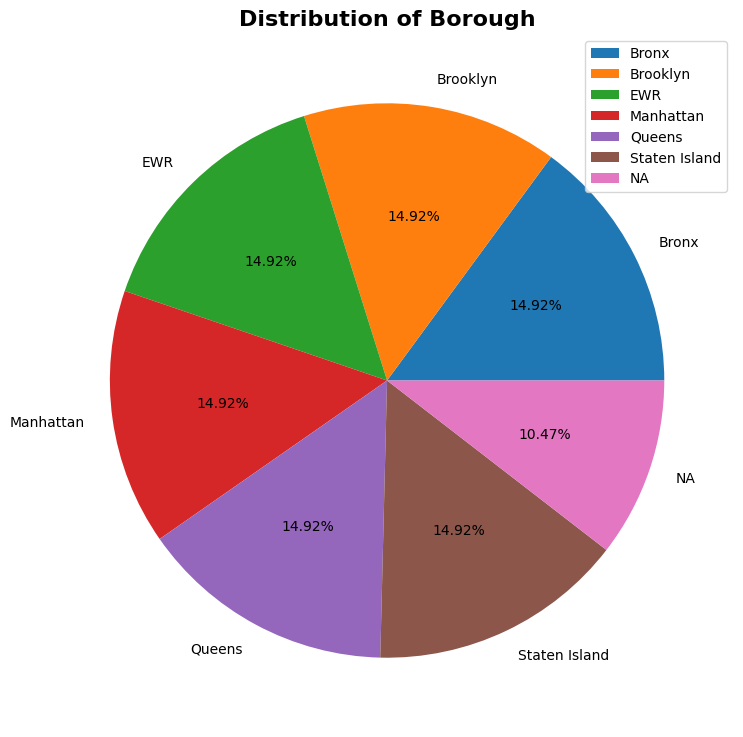

In [13]:
plt.figure(figsize=(9, 9))
df['borough'].value_counts().plot(kind='pie', autopct='%.2f%%')

ax = plt.gca()
ax.set_ylabel('') 
for patch in ax.patches:
    ax.annotate("", xy=(0, 0), xytext=patch.center, fontsize=12, ha='center')

plt.title("Distribution of Borough", fontsize=16, fontweight='bold')
plt.legend(df['borough'].value_counts().index, loc='upper right')

plt.show()


In [14]:
df.isna().all(axis = 1)

0        False
1        False
2        False
3        False
4        False
         ...  
29096    False
29097    False
29098    False
29099    False
29100    False
Length: 25198, dtype: bool

In [15]:
df.isna().any(axis = 1)

0        False
1        False
2        False
3        False
4        False
         ...  
29096    False
29097    False
29098    False
29099    False
29100    False
Length: 25198, dtype: bool

In [16]:
df.isnull().sum()

pickup_dt          0
borough            0
pickups            0
spd                0
vsb                0
temp               0
dewp               0
slp                0
pcp01              0
pcp06              0
pcp24              0
sd                 0
hday               0
pickup_dt (M/Y)    0
dtype: int64

In [17]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29096    False
29097    False
29098    False
29099    False
29100    False
Length: 25198, dtype: bool

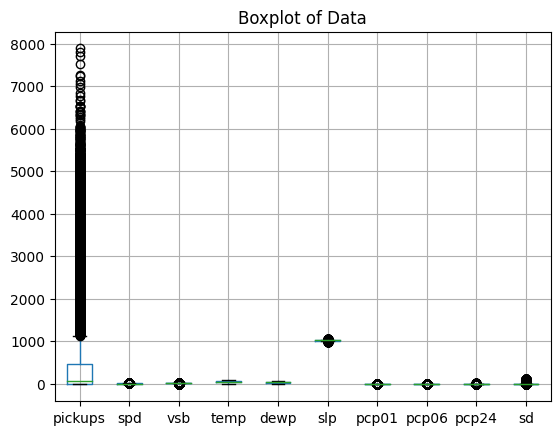

In [18]:
df.boxplot()
plt.title('Boxplot of Data')
plt.show()

In [19]:
df.iloc[2910]

pickup_dt          21/01/2015 0:00
borough                        EWR
pickups                          0
spd                           5.50
vsb                          10.00
temp                         38.00
dewp                         18.00
slp                        1014.30
pcp01                         0.00
pcp06                         0.00
pcp24                         0.00
sd                            0.00
hday                             N
pickup_dt (M/Y)            01/2015
Name: 3158, dtype: object

In [20]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr(method='pearson')
print(correlation_matrix)

         pickups   spd   vsb  temp  dewp   slp  pcp01  pcp06  pcp24    sd
pickups     1.00  0.01 -0.01  0.05  0.03 -0.02   0.00   0.00  -0.02 -0.00
spd         0.01  1.00  0.07 -0.29 -0.31 -0.08   0.01   0.01   0.03  0.11
vsb        -0.01  0.07  1.00  0.01 -0.23  0.14  -0.48  -0.12  -0.00  0.02
temp        0.05 -0.29  0.01  1.00  0.90 -0.23  -0.03  -0.02  -0.01 -0.33
dewp        0.03 -0.31 -0.23  0.90  1.00 -0.30   0.09   0.02  -0.01 -0.30
slp        -0.02 -0.08  0.14 -0.23 -0.30  1.00  -0.07  -0.11  -0.09 -0.03
pcp01       0.00  0.01 -0.48 -0.03  0.09 -0.07   1.00   0.13   0.00 -0.02
pcp06       0.00  0.01 -0.12 -0.02  0.02 -0.11   0.13   1.00   0.16 -0.01
pcp24      -0.02  0.03 -0.00 -0.01 -0.01 -0.09   0.00   0.16   1.00  0.00
sd         -0.00  0.11  0.02 -0.33 -0.30 -0.03  -0.02  -0.01   0.00  1.00


In [1]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'df' is not defined

<Figure size 640x480 with 0 Axes>

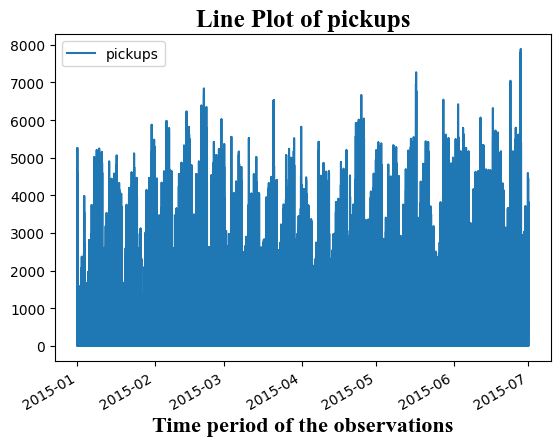

<Figure size 640x480 with 0 Axes>

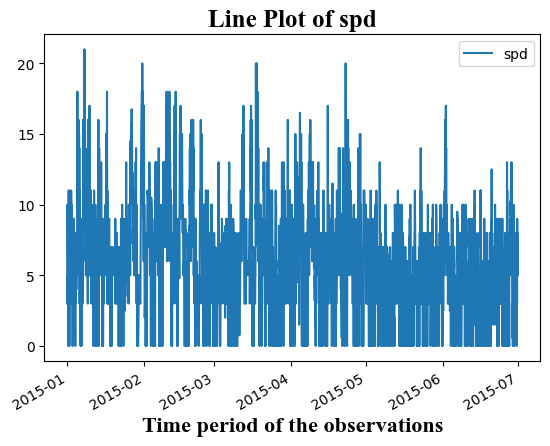

<Figure size 640x480 with 0 Axes>

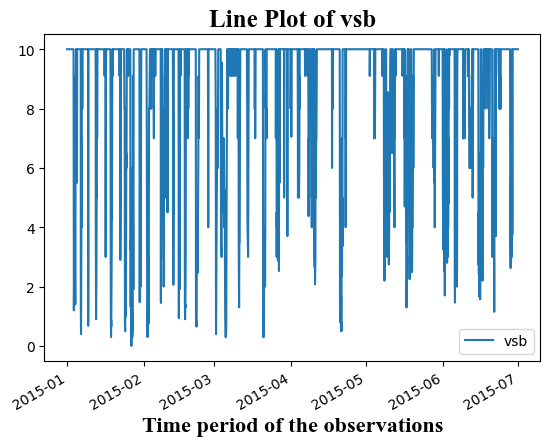

<Figure size 640x480 with 0 Axes>

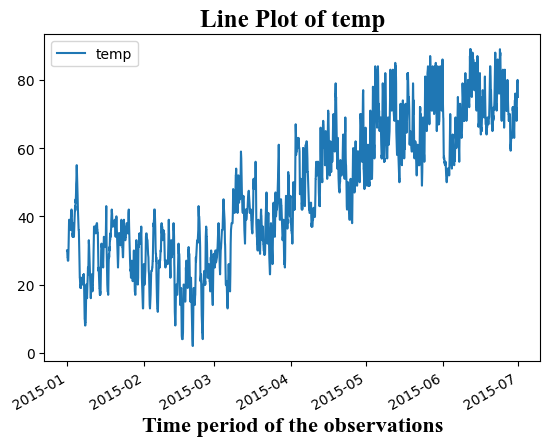

<Figure size 640x480 with 0 Axes>

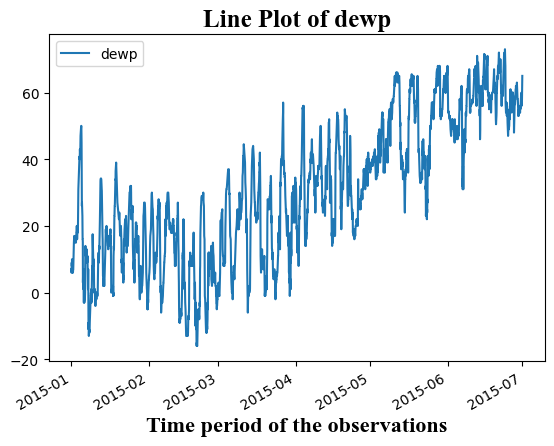

<Figure size 640x480 with 0 Axes>

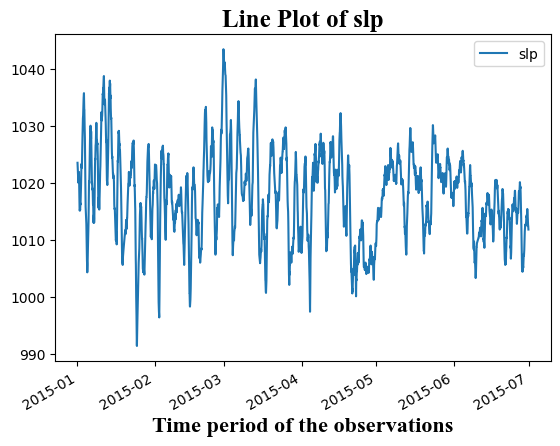

<Figure size 640x480 with 0 Axes>

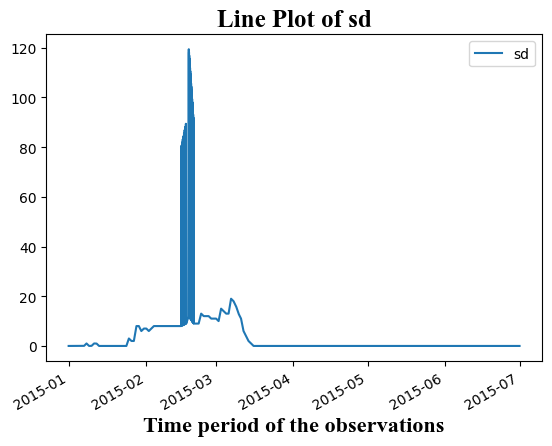

<Figure size 640x480 with 0 Axes>

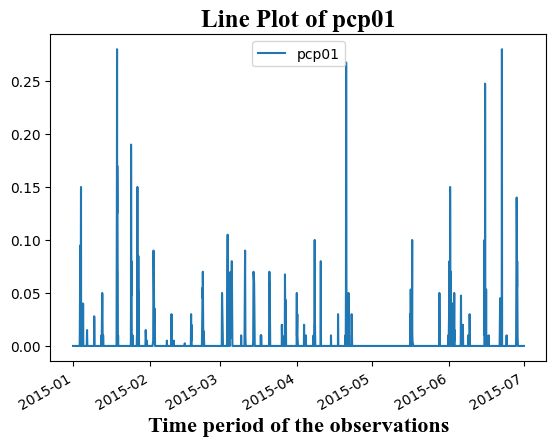

<Figure size 640x480 with 0 Axes>

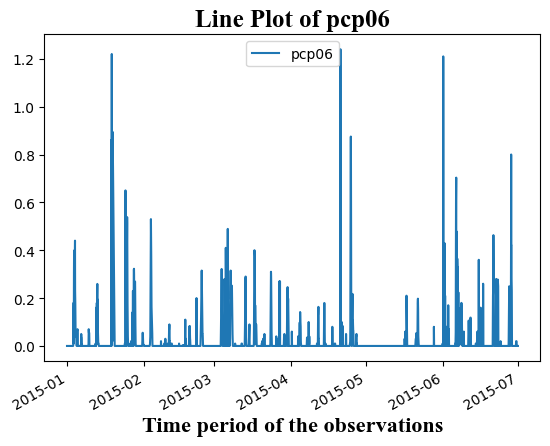

<Figure size 640x480 with 0 Axes>

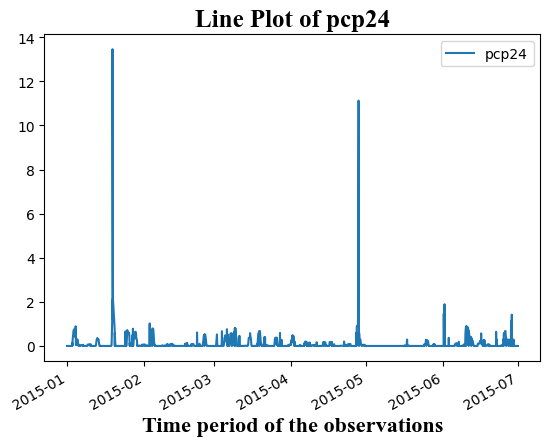

In [22]:
columns = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'sd', 'pcp01', 'pcp06', 'pcp24']
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d/%m/%Y %H:%M")
for column in columns:
    plt.figure()
    df.plot(x='pickup_dt', y=column, kind='line')
    plt.title(f'Line Plot of {column}', fontsize=18, fontname='Times New Roman', weight='bold')
    plt.xlabel('Time period of the observations', fontsize=16, fontname='Times New Roman', weight='bold')
    plt.show()

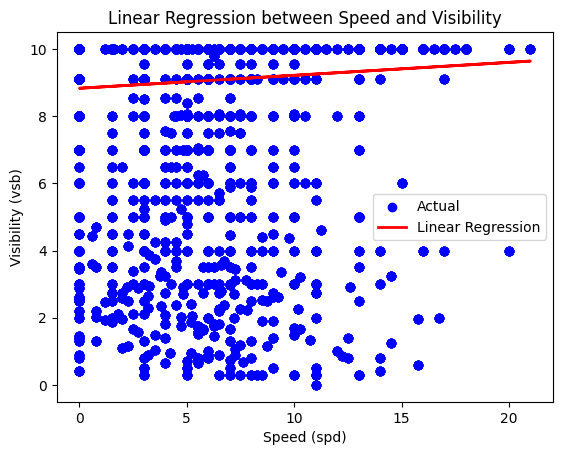

In [23]:
X = df[['spd']]
y = df['vsb']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (spd)')
plt.ylabel('Visibility (vsb)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

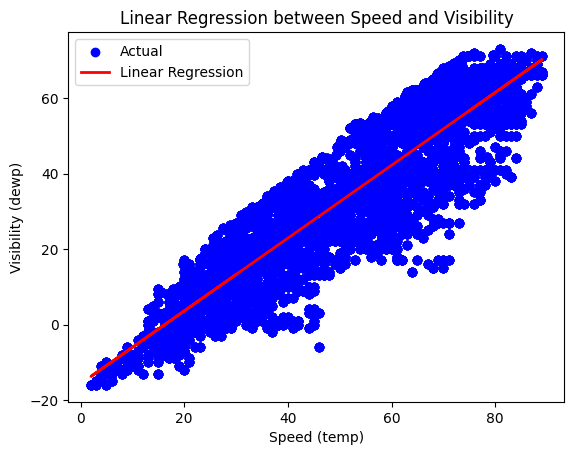

In [24]:
X = df[['temp']]
y = df['dewp']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (temp)')
plt.ylabel('Visibility (dewp)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

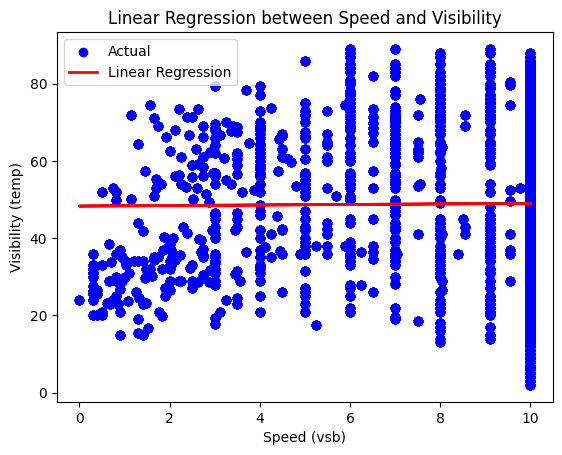

In [25]:
X = df[['vsb']]
y = df['temp']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (vsb)')
plt.ylabel('Visibility (temp)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

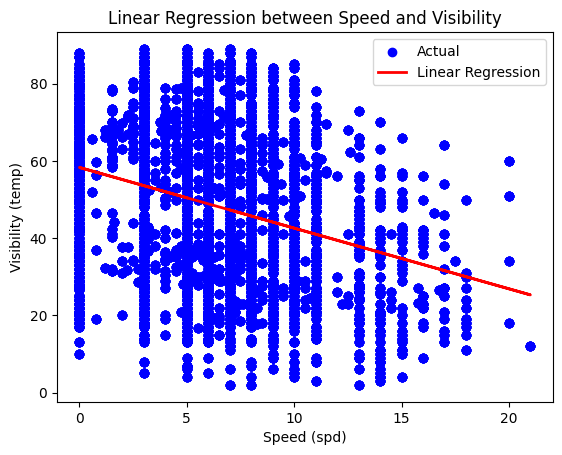

In [26]:
X = df[['spd']]
y = df['temp']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (spd)')
plt.ylabel('Visibility (temp)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

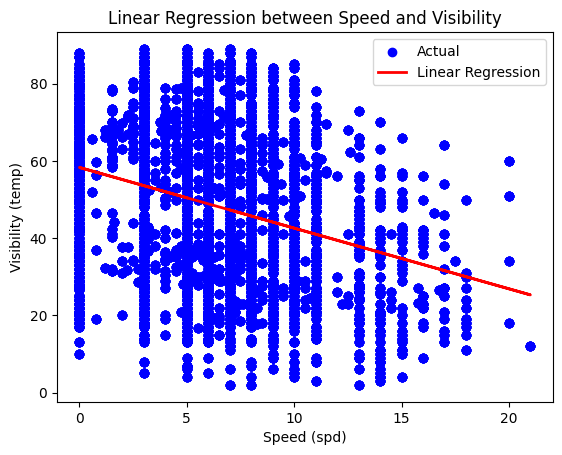

In [27]:
X = df[['spd']]
y = df['temp']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (spd)')
plt.ylabel('Visibility (temp)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

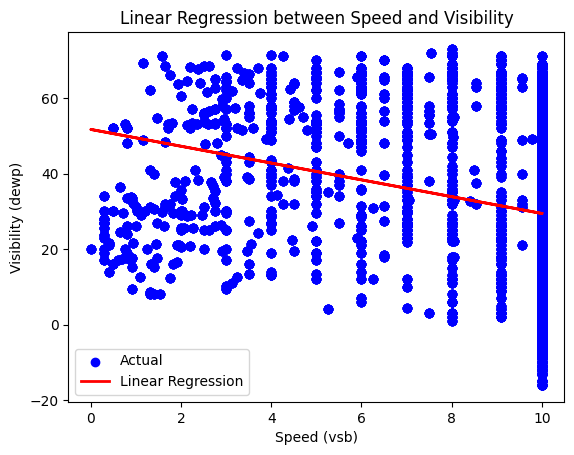

In [28]:
X = df[['vsb']]
y = df['dewp']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (vsb)')
plt.ylabel('Visibility (dewp)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

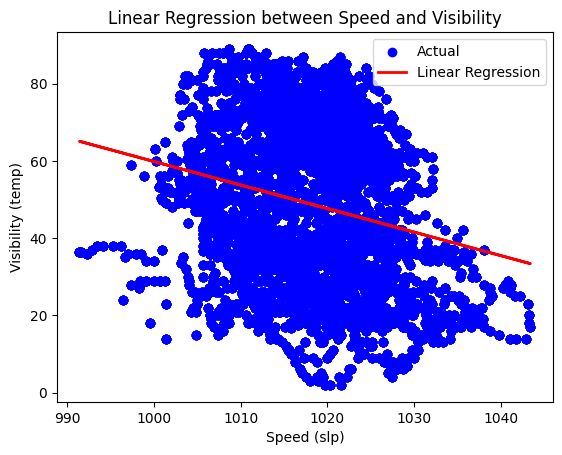

In [29]:
X = df[['slp']]
y = df['temp']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (slp)')
plt.ylabel('Visibility (temp)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

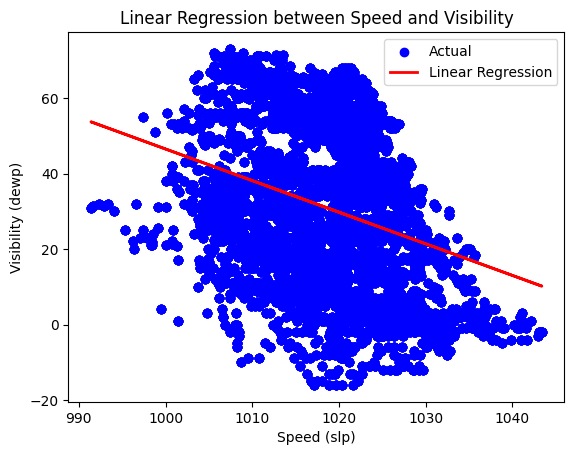

In [30]:
X = df[['slp']]
y = df['dewp']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (slp)')
plt.ylabel('Visibility (dewp)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

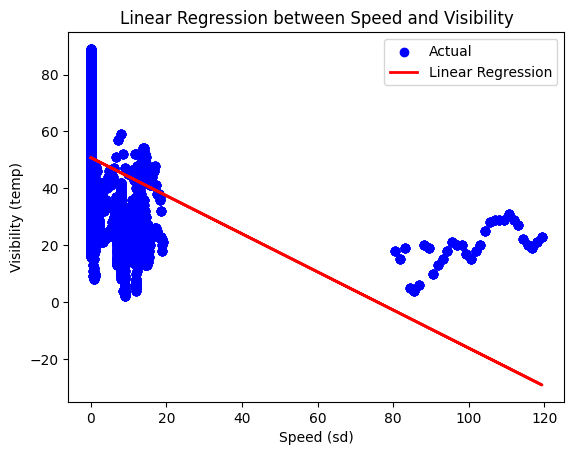

In [31]:
X = df[['sd']]
y = df['temp']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Speed (sd)')
plt.ylabel('Visibility (temp)')
plt.title('Linear Regression between Speed and Visibility')
plt.legend()
plt.show()

1. Positive LinearRegression lines show that 2 variables have a positive correlation relationship
2. LinearRegression = 0 means that the target variable value does not change based on the input variable and the model only relies on the base point value to predict
3. Negative LinearRegression means that when the input variable value increases, the target variable value decreases => Inverse correlation between variables.

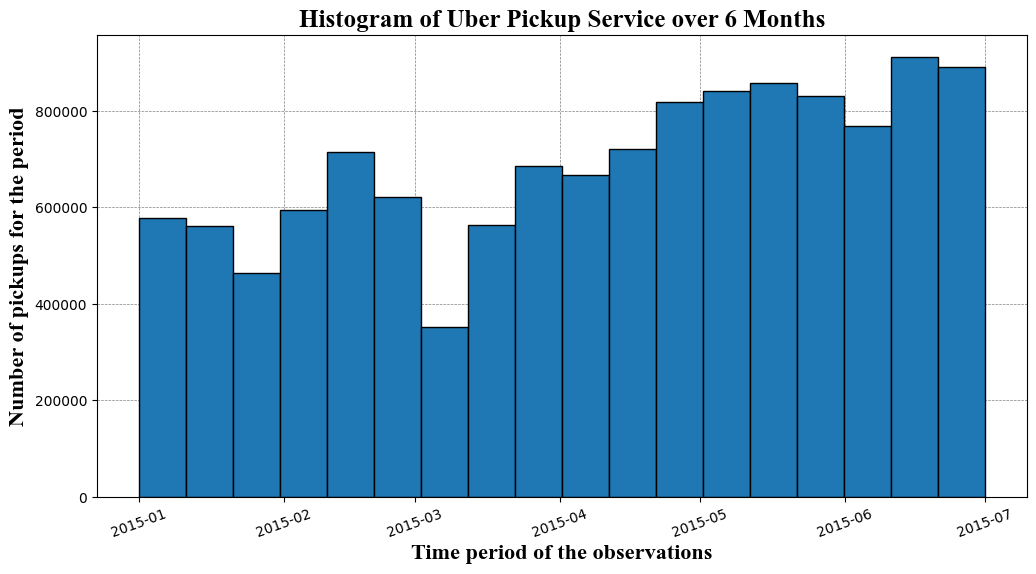

In [32]:
plt.figure(figsize=(12, 6))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_axisbelow(True)
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d/%m/%Y %H:%M")

plt.hist(df['pickup_dt'], bins=18, edgecolor='black', weights=df['pickups'])

plt.xlabel('Time period of the observations', fontsize=16, fontname='Times New Roman', weight='bold')
plt.ylabel('Number of pickups for the period', fontsize=16, fontname='Times New Roman', weight='bold')
plt.title('Histogram of Uber Pickup Service over 6 Months', fontsize=18, fontname='Times New Roman', weight='bold')

plt.xticks(rotation=20)

plt.show()


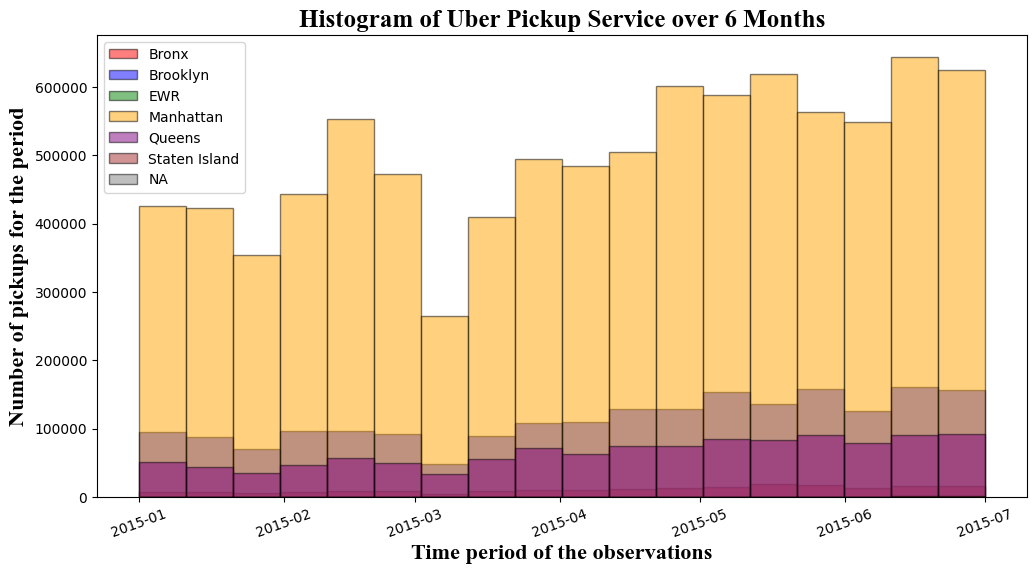

In [33]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray']

plt.figure(figsize=(12, 6))
plt.gca().set_axisbelow(True)
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d/%m/%Y %H:%M")

for i, borough in enumerate(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'NA']):
    subset = df[df['borough'] == borough]
    plt.hist(subset['pickup_dt'], bins=18, edgecolor='black', weights=subset['pickups'], color=colors[i], alpha=0.5)

plt.xlabel('Time period of the observations', fontsize=16, fontname='Times New Roman', weight='bold')
plt.ylabel('Number of pickups for the period', fontsize=16, fontname='Times New Roman', weight='bold')
plt.title('Histogram of Uber Pickup Service over 6 Months', fontsize=18, fontname='Times New Roman', weight='bold')

plt.xticks(rotation=20)
plt.legend(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'NA'])

plt.show()


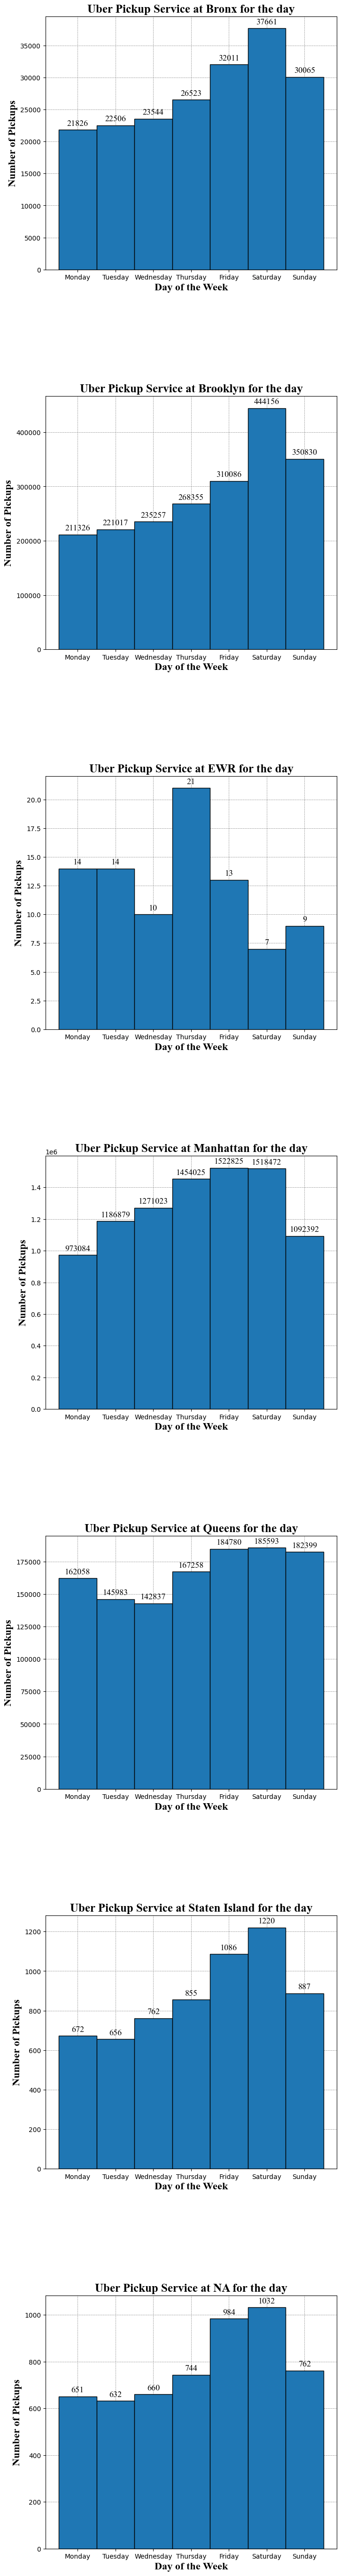

In [34]:
boroughs = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'NA']
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d/%m/%Y %H:%M")

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 70))
fig.subplots_adjust(hspace=0.5)

for i, borough in enumerate(boroughs):
    ax = axes[i]
    borough_data = df[df['borough'] == borough]
    days_of_week = borough_data['pickup_dt'].dt.dayofweek
    bin_edges = np.arange(8) - 0.5 
    counts, _, _ = ax.hist(days_of_week, bins=bin_edges, edgecolor='black', weights=borough_data['pickups'])
    ax.set_xlabel('Day of the Week', fontsize=16, fontname='Times New Roman', weight='bold')
    ax.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
    ax.set_title(f'Uber Pickup Service at {borough} for the day', fontsize=18, fontname='Times New Roman', weight='bold')
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.set_axisbelow(True)
    ax.tick_params(axis='x')
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)

    for count, x in zip(counts, bin_edges[:-1]):
        ax.text(x + 0.5, count + 0.01 * max(counts), int(count), ha='center', va='bottom', fontsize=13, fontname='Times New Roman')

plt.show()


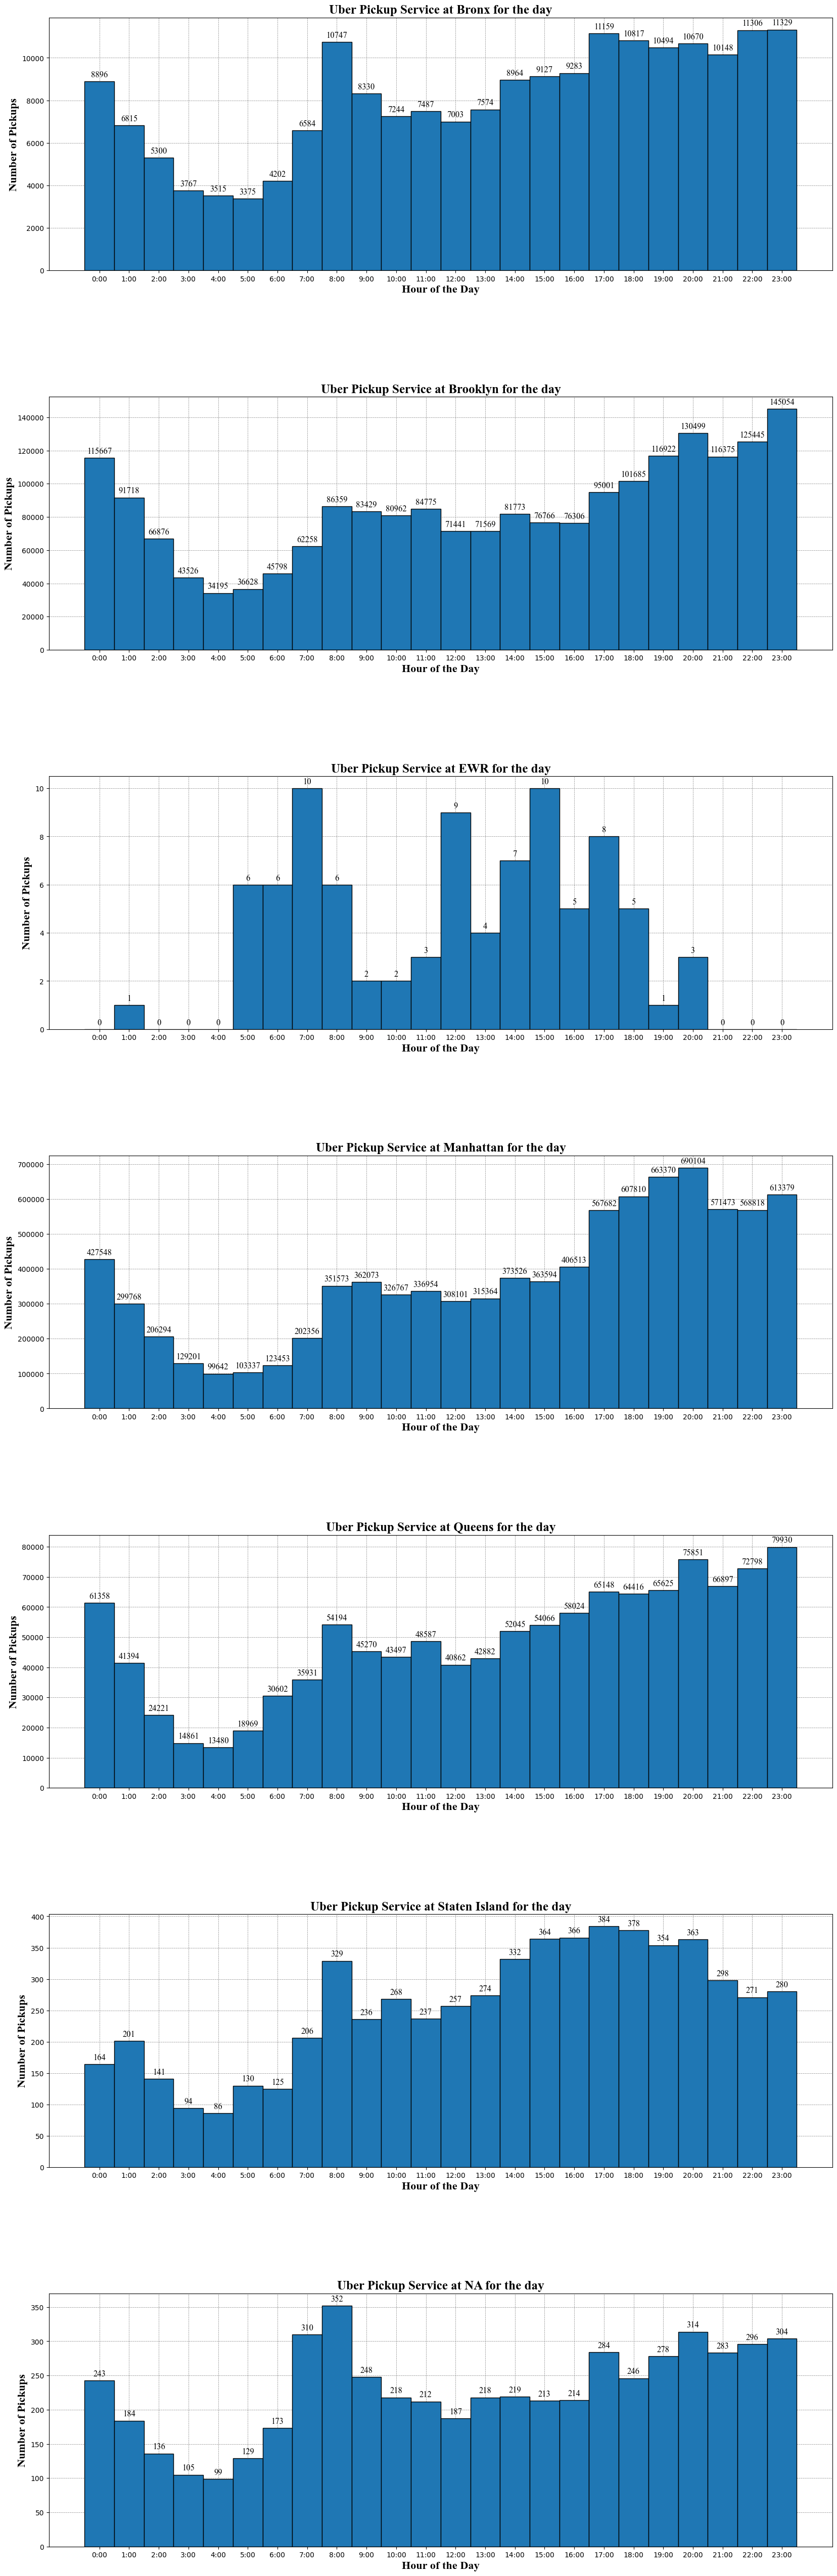

In [35]:
boroughs = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'NA']
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d/%m/%Y %H:%M")

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 65))
fig.subplots_adjust(hspace=0.5)

for i, borough in enumerate(boroughs):
    ax = axes[i]
    borough_data = df[df['borough'] == borough]
    hours = borough_data['pickup_dt'].dt.hour
    bin_edges = np.arange(25) - 0.5  # Specify the boundary of bins
    counts, _, _ = ax.hist(hours, bins=bin_edges, edgecolor='black', weights=borough_data['pickups'])
    ax.set_xlabel('Hour of the Day', fontsize=16, fontname='Times New Roman', weight='bold')
    ax.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
    ax.set_title(f'Uber Pickup Service at {borough} for the day', fontsize=18, fontname='Times New Roman', weight='bold')
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.set_axisbelow(True)
    ax.tick_params(axis='x')
    ax.set_xticks(range(24))
    ax.set_xticklabels([str(hour) + ':00' for hour in range(24)], rotation=0)
    
    for count, x in zip(counts, bin_edges[:-1]):
        ax.text(x + 0.5, count + 0.01 * max(counts), int(count), ha='center', va='bottom', fontsize=12, fontname='Times New Roman')

plt.show()


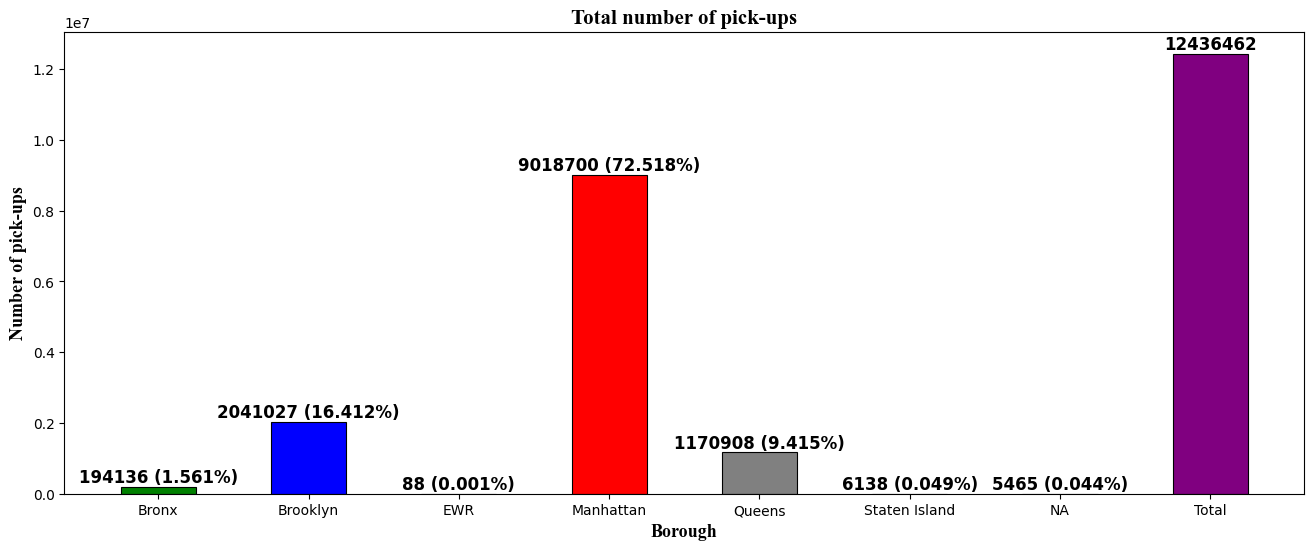

In [36]:
def plot_borough_pickups(df):
    fig, ax = plt.subplots(figsize=(16, 6))

    boroughs = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'NA']
    Pickups_sum = [
        df[df['borough'] == 'Bronx']['pickups'].sum(),
        df[df['borough'] == 'Brooklyn']['pickups'].sum(),
        df[df['borough'] == 'EWR']['pickups'].sum(),
        df[df['borough'] == 'Manhattan']['pickups'].sum(),
        df[df['borough'] == 'Queens']['pickups'].sum(),
        df[df['borough'] == 'Staten Island']['pickups'].sum(),
        df[df['borough'] == 'NA']['pickups'].sum(),
    ]

    total_pickups = sum(Pickups_sum)

    percentages = [round(100 * (pickups / total_pickups), 3) for pickups in Pickups_sum]

    boroughs.append('Total')
    Pickups_sum.append(total_pickups)

    bars = ax.bar(boroughs, Pickups_sum,
                 width=0.5,
                 color=['green', 'blue', 'pink', 'red', 'gray', 'orange', 'brown', 'purple'],
                 edgecolor="black", linewidth=0.8)

    ax.set_title("Total number of pick-ups", fontsize=15, weight='bold', fontname='Times New Roman')
    ax.set_xlabel("Borough", fontsize=13, weight='bold', fontname='Times New Roman')
    ax.set_ylabel("Number of pick-ups", fontsize=13, weight='bold', fontname='Times New Roman')

    for i, label in enumerate(boroughs):
        if label != 'Total':
            percentage_label = f"{Pickups_sum[i]} ({percentages[i]:.3f}%)"
        else:
            percentage_label = f"{Pickups_sum[i]}"
        ax.text(i, Pickups_sum[i], percentage_label, ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.show()

plot_borough_pickups(df)


In [37]:
df['hday'].value_counts()

hday
N    24318
Y      880
Name: count, dtype: int64

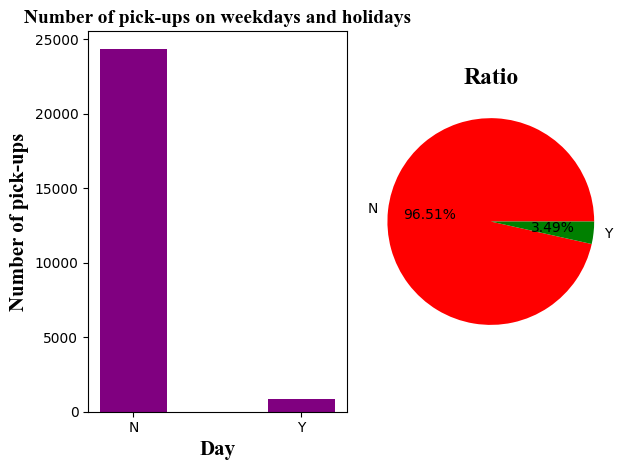

In [38]:
fig = plt.figure()
fig1 = fig.add_subplot(1, 2, 1)
fig2 = fig.add_subplot(1, 2, 2)

df3 = df.groupby(by=['hday']).size().reset_index(name="counts")
fig1.bar(df3['hday'], df3['counts'], color ='purple',width = 0.4)
fig1.set_xlabel("Day", fontsize = 15, weight = 'bold', fontname = "Times New Roman")
fig1.set_ylabel("Number of pick-ups", fontsize = 15, weight = 'bold', fontname = "Times New Roman")
fig1.set_title("Number of pick-ups on weekdays and holidays", fontsize = 14, weight = 'bold', fontname = "Times New Roman")

df4 = df['hday'].value_counts()
fig2.pie(df4, labels=df4.index, colors=['red', 'green'], autopct="%.2f%%")
fig2.set_title("Ratio", fontsize=17, weight='bold', fontname="Times New Roman")


plt.tight_layout()
plt.show()

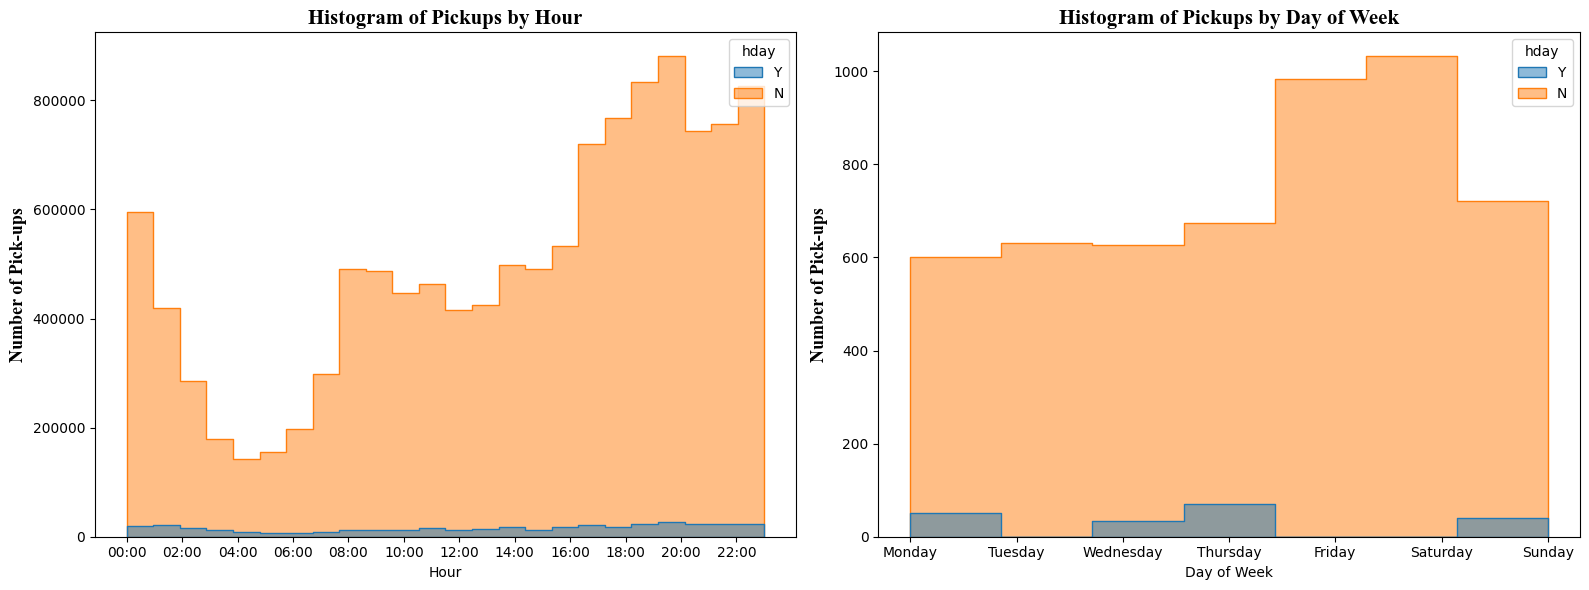

In [39]:
import datetime

df['hours'] = df['pickup_dt'].dt.hour
df['DayofWeek'] = df['pickup_dt'].dt.dayofweek
borough_data = df[df['borough'] == borough]

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='hours', weights='pickups', bins=24, kde=False, element='step', hue='hday', alpha=0.5)
plt.xlabel('Hour')
plt.ylabel('Number of Pick-ups', fontsize = 13, weight = 'bold', fontname = "Times New Roman")
plt.title('Histogram of Pickups by Hour', fontsize = 15, weight = 'bold', fontname = "Times New Roman")
plt.xticks(range(0, 24, 2), [datetime.time(hour).strftime("%H:%M") for hour in range(0, 24, 2)], rotation=0)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='DayofWeek', weights=borough_data['pickups'], bins=7, kde=False, element='step', hue='hday', alpha=0.5)
plt.xlabel('Day of Week')
plt.ylabel('Number of Pick-ups', fontsize = 13, weight = 'bold', fontname = "Times New Roman")
plt.title('Histogram of Pickups by Day of Week', fontsize = 15, weight = 'bold', fontname = "Times New Roman")
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)

plt.tight_layout()
plt.show()


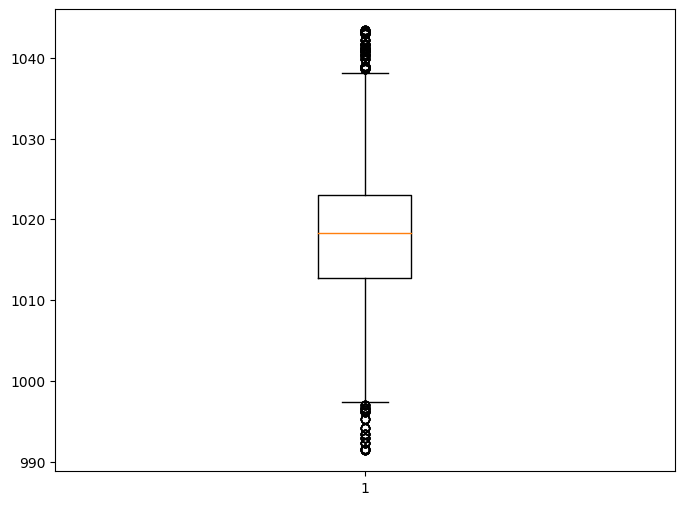

In [40]:
fig = plt.figure(figsize = (8, 6))
plt.boxplot(df['slp'])
plt.show()

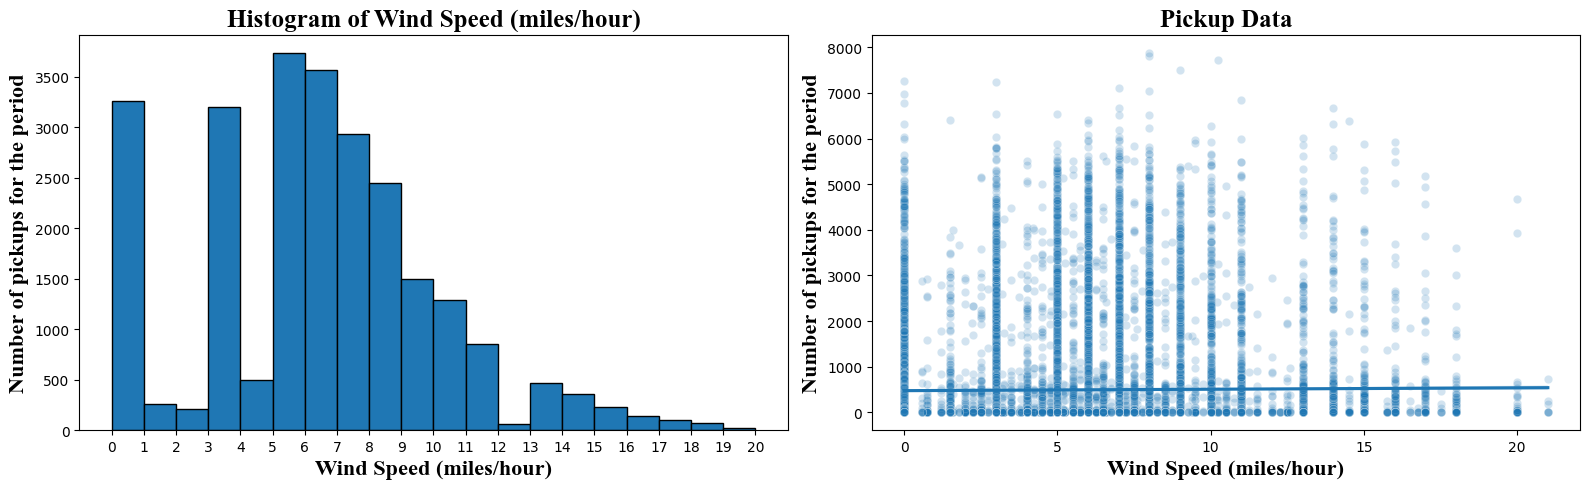

count   25198.00
mean        5.96
std         3.66
min         0.00
25%         3.00
50%         6.00
75%         8.00
max        21.00
Name: spd, dtype: float64


In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(df['spd'], bins=range(0, 21, 1), edgecolor='black')
ax1.set_xlabel('Wind Speed (miles/hour)', fontsize=16, fontname='Times New Roman', weight='bold')
ax1.set_ylabel('Number of pickups for the period', fontsize=16, fontname='Times New Roman', weight='bold')
ax1.set_title('Histogram of Wind Speed (miles/hour)', fontsize=18, fontname='Times New Roman', weight='bold')
ax1.set_xticks(range(0, 21, 1))

uber_spread = pd.DataFrame({'spd': df['spd'], 'pickups': df['pickups']})
sns.scatterplot(data=uber_spread, x='spd', y='pickups', alpha=0.2, ax=ax2)
sns.regplot(data=uber_spread, x='spd', y='pickups', scatter=False, ax=ax2)
ax2.set_xlabel('Wind Speed (miles/hour)', fontsize=16, fontname='Times New Roman', weight='bold')
ax2.set_ylabel('Number of pickups for the period', fontsize=16, fontname='Times New Roman', weight='bold')
ax2.set_title('Pickup Data', fontsize=18, fontname='Times New Roman', weight='bold')

plt.tight_layout()
plt.show()

temp_summary = df['spd'].describe()
print(temp_summary)

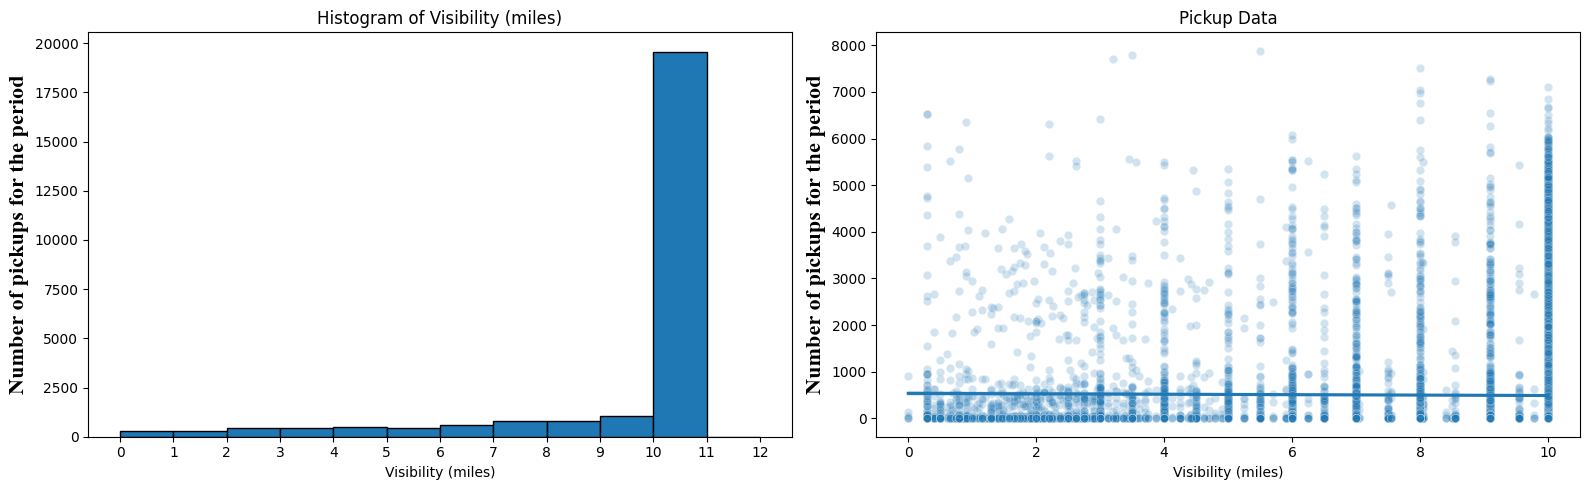

count   25198.00
mean        9.06
std         2.16
min         0.00
25%        10.00
50%        10.00
75%        10.00
max        10.00
Name: vsb, dtype: float64


In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(df['vsb'], bins=range(0, 13, 1), edgecolor='black')
ax1.set_xlabel('Visibility (miles)')
ax1.set_ylabel('Number of pickups for the period', fontsize=16, fontname='Times New Roman', weight='bold')
ax1.set_title('Histogram of Visibility (miles)')
ax1.set_xticks(range(0, 13, 1))

uber_spread = pd.DataFrame({'vsb': df['vsb'], 'pickups': df['pickups']})
sns.scatterplot(data=uber_spread, x='vsb', y='pickups', alpha=0.2, ax=ax2)
sns.regplot(data=uber_spread, x='vsb', y='pickups', scatter=False, ax=ax2)
ax2.set_xlabel('Visibility (miles)')
ax2.set_ylabel('Number of pickups for the period', fontsize=16, fontname='Times New Roman', weight='bold')
ax2.set_title('Pickup Data')

plt.tight_layout()
plt.show()

temp_summary = df['vsb'].describe()
print(temp_summary)

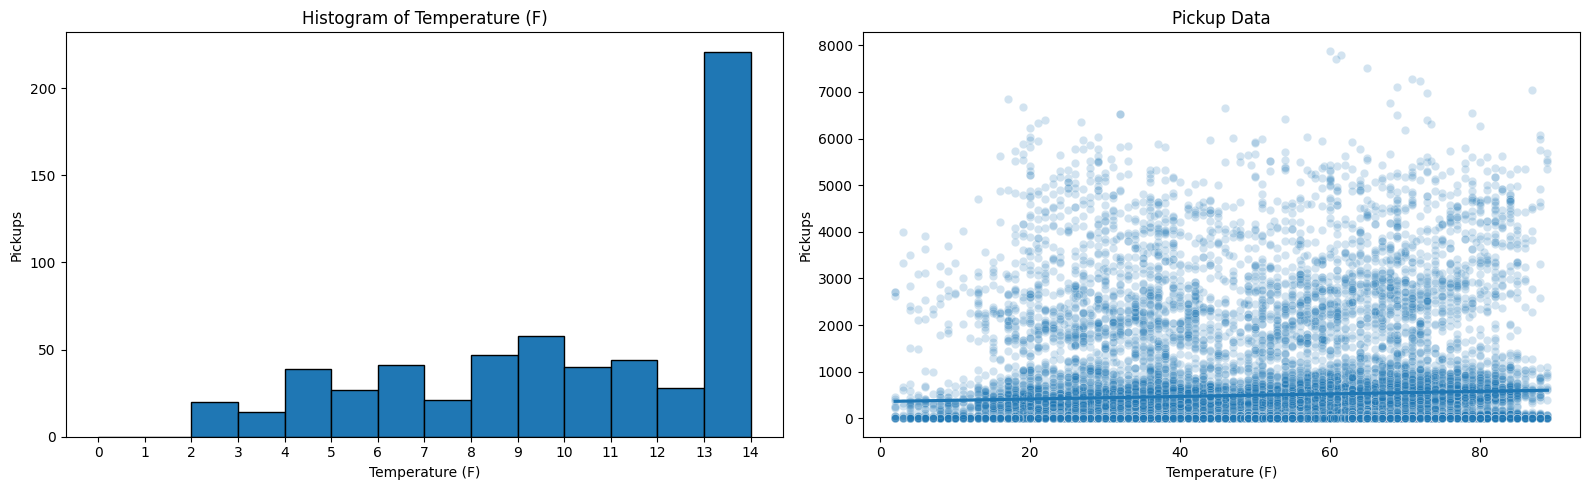

count    25198.000000
mean        48.939838
std         19.928097
min          2.000000
25%         33.000000
50%         50.000000
75%         66.000000
max         89.000000
Name: temp, dtype: float64


In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(df['temp'], bins=range(0, 15, 1), edgecolor='black')
ax1.set_xlabel('Temperature (F)')
ax1.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
ax1.set_title('Histogram of Temperature (F)')
ax1.set_xticks(range(0, 15, 1))

uber_spread = pd.DataFrame({'temp': df['temp'], 'pickups': df['pickups']})
sns.scatterplot(data=uber_spread, x='temp', y='pickups', alpha=0.2, ax=ax2)
sns.regplot(data=uber_spread, x='temp', y='pickups', scatter=False, ax=ax2)
ax2.set_xlabel('Temperature (F)')
ax2.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
ax2.set_title('Pickup Data')

plt.tight_layout()
plt.show()

temp_summary = df['temp'].describe()
print(temp_summary)

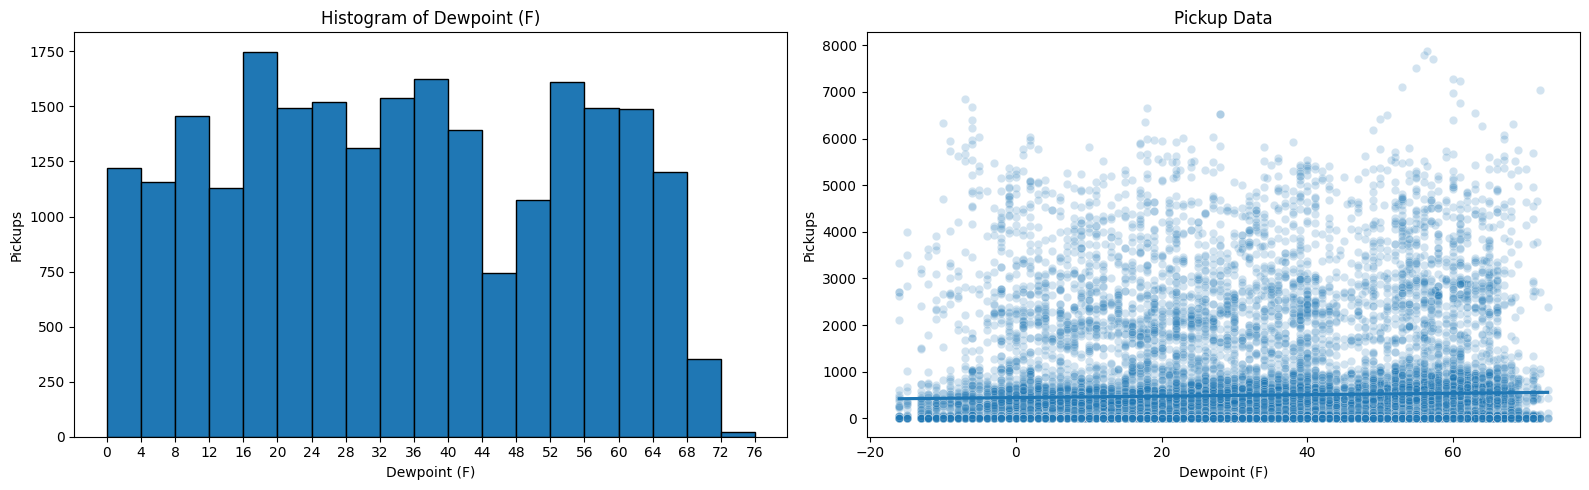

count    25198.000000
mean        31.509334
std         21.328309
min        -16.000000
25%         15.000000
50%         31.000000
75%         51.000000
max         73.000000
Name: dewp, dtype: float64


In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(df['dewp'], bins=range(0, 80, 4), edgecolor='black')
ax1.set_xlabel('Dewpoint (F)')
ax1.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
ax1.set_title('Histogram of Dewpoint (F)')
ax1.set_xticks(range(0, 80, 4))

uber_spread = pd.DataFrame({'dewp': df['dewp'], 'pickups': df['pickups']})
sns.scatterplot(data=uber_spread, x='dewp', y='pickups', alpha=0.2, ax=ax2)
sns.regplot(data=uber_spread, x='dewp', y='pickups', scatter=False, ax=ax2)
ax2.set_xlabel('Dewpoint (F)')
ax2.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
ax2.set_title('Pickup Data')

plt.tight_layout()
plt.show()

temp_summary = df['dewp'].describe()
print(temp_summary)


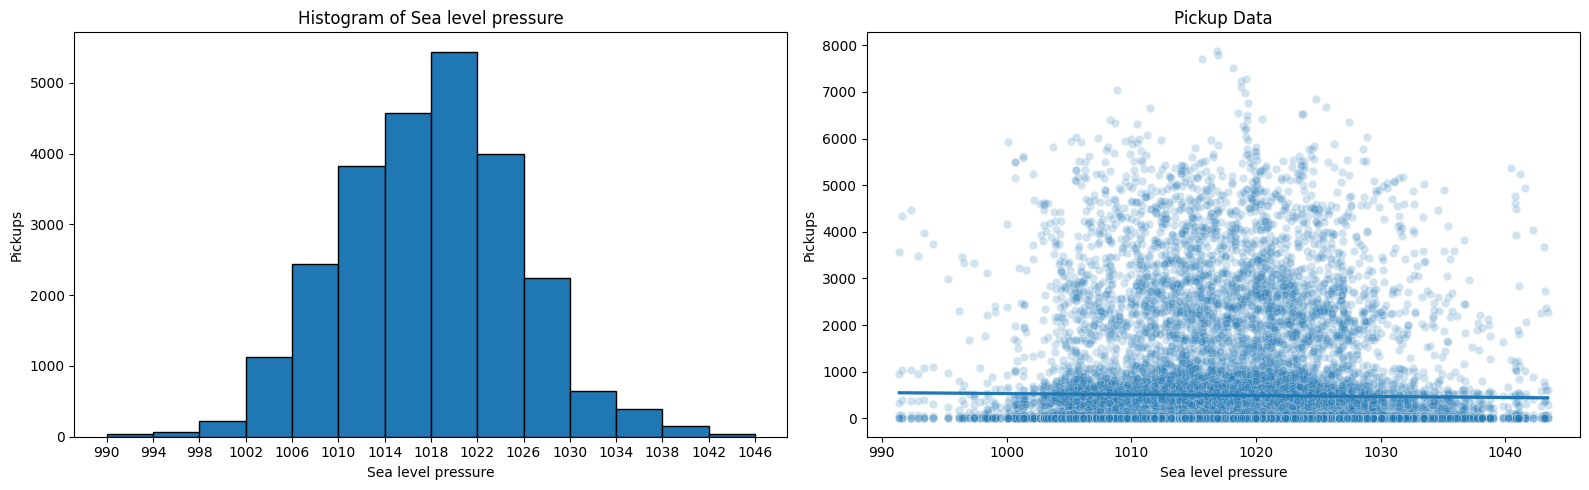

count    25198.000000
mean      1017.899302
std          7.631653
min        991.400000
25%       1012.700000
50%       1018.300000
75%       1023.000000
max       1043.400000
Name: slp, dtype: float64


In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(df['slp'], bins=range(990, 1050, 4), edgecolor='black')
ax1.set_xlabel('Sea level pressure')
ax1.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
ax1.set_title('Histogram of Sea level pressure')
ax1.set_xticks(range(990, 1050, 4))

uber_spread = pd.DataFrame({'slp': df['slp'], 'pickups': df['pickups']})
sns.scatterplot(data=uber_spread, x='slp', y='pickups', alpha=0.2, ax=ax2)
sns.regplot(data=uber_spread, x='slp', y='pickups', scatter=False, ax=ax2)
ax2.set_xlabel('Sea level pressure')
ax2.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
ax2.set_title('Pickup Data')

plt.tight_layout()
plt.show()

temp_summary = df['slp'].describe()
print(temp_summary)

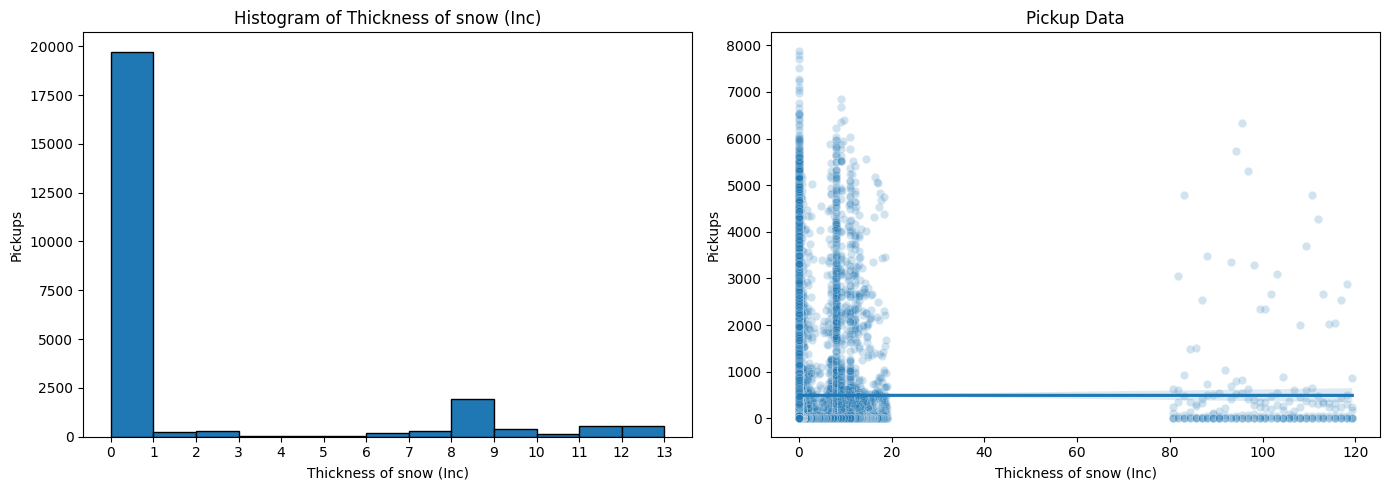

count    25198.000000
mean         2.727700
std          9.907299
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        119.375000
Name: sd, dtype: float64


In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(df['sd'], bins=range(0, 14, 1), edgecolor='black')
ax1.set_xlabel('Thickness of snow (Inc)')
ax1.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
ax1.set_title('Histogram of Thickness of snow (Inc)')
ax1.set_xticks(range(0, 14, 1))

uber_spread = pd.DataFrame({'sd': df['sd'], 'pickups': df['pickups']})
sns.scatterplot(data=uber_spread, x='sd', y='pickups', alpha=0.2, ax=ax2)
sns.regplot(data=uber_spread, x='sd', y='pickups', scatter=False, ax=ax2)
ax2.set_xlabel('Thickness of snow (Inc)')
ax2.set_ylabel('Number of Pickups', fontsize=16, fontname='Times New Roman', weight='bold')
ax2.set_title('Pickup Data')

plt.tight_layout()
plt.show()

temp_summary = df['sd'].describe()
print(temp_summary)

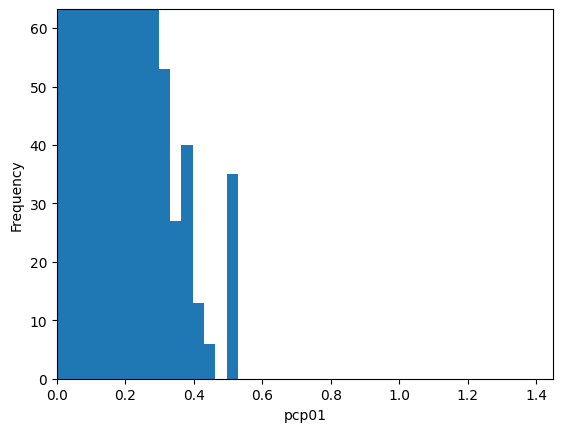

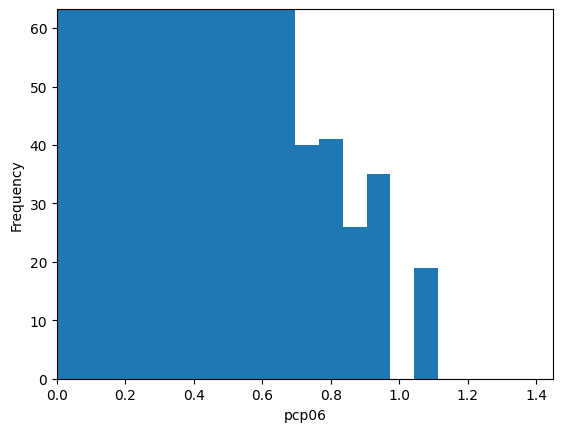

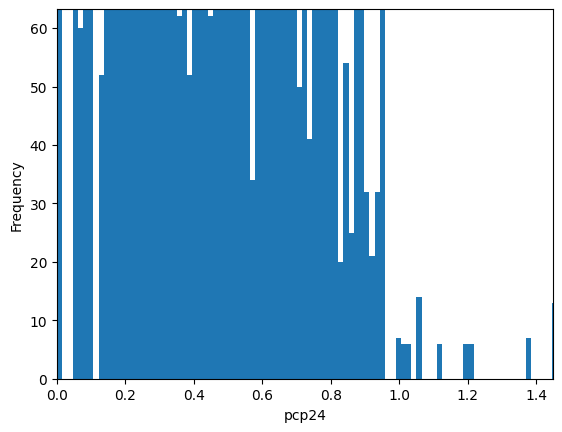

In [48]:
def pcp_hist(varname):
    plt.figure()
    transformed_data = df[varname].astype(float).apply(np.sqrt)
    plt.hist(transformed_data, bins='auto')
    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlim(0, np.sqrt(2.1))
    plt.ylim(0, np.sqrt(4000))
    plt.xlabel(varname)
    plt.ylabel('Frequency')

h1 = pcp_hist('pcp01')
h2 = pcp_hist('pcp06')
h3 = pcp_hist('pcp24')

plt.subplots_adjust(hspace=0.4)
plt.show()


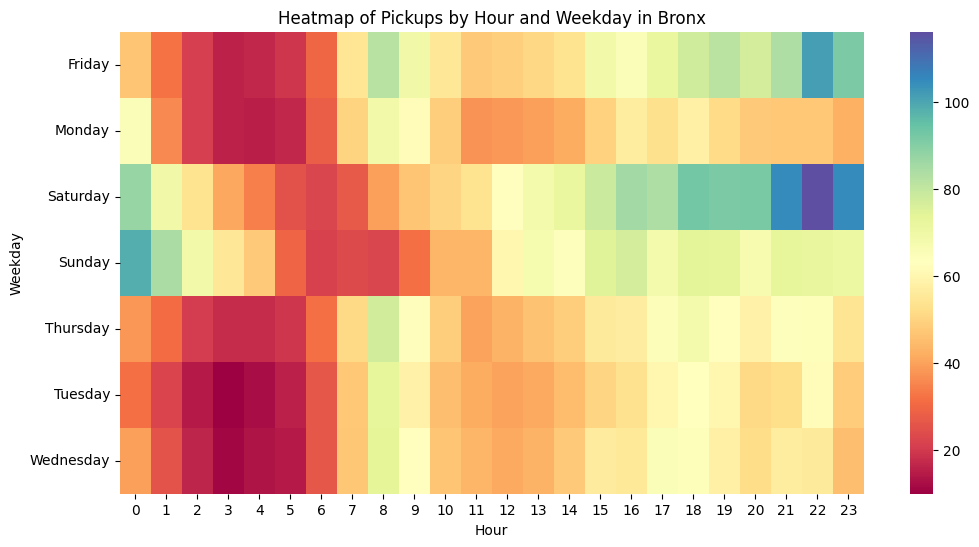

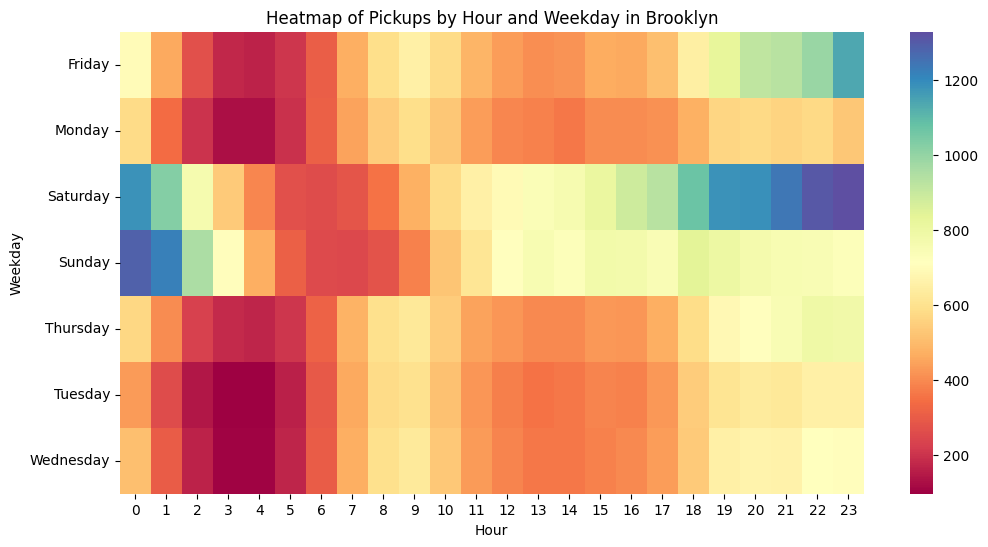

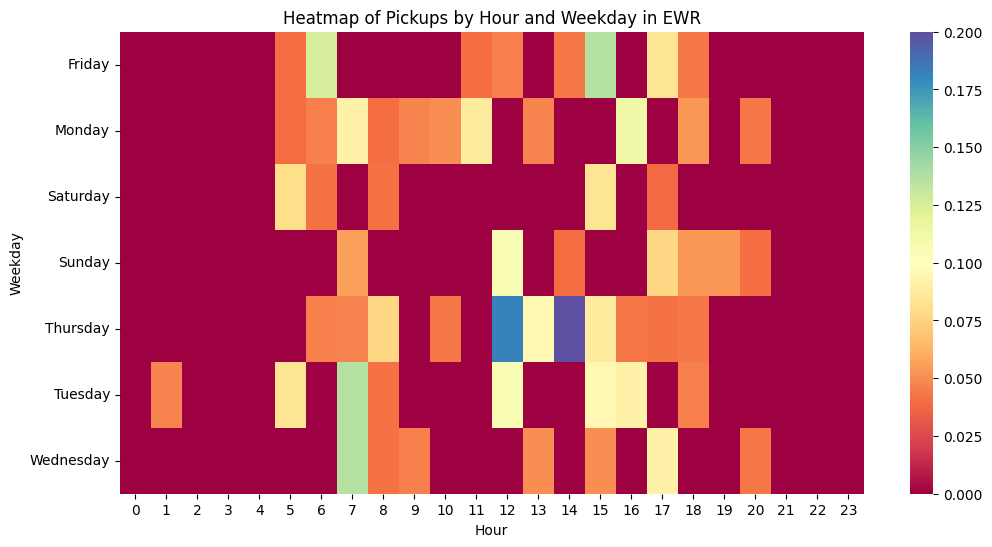

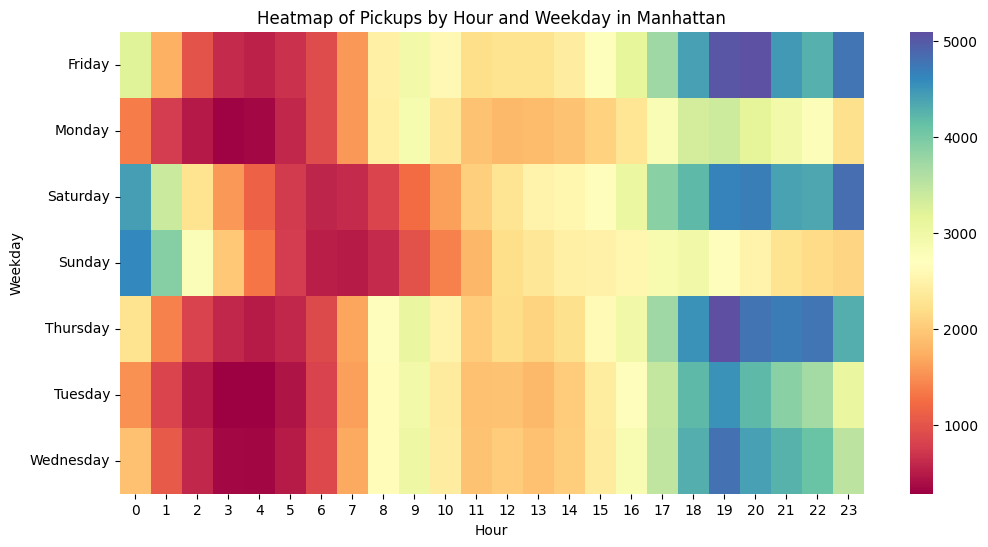

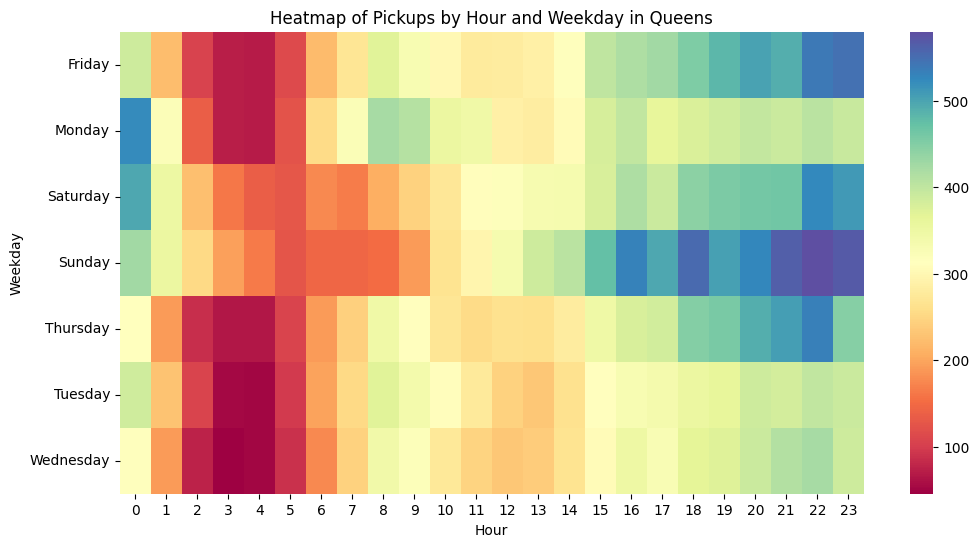

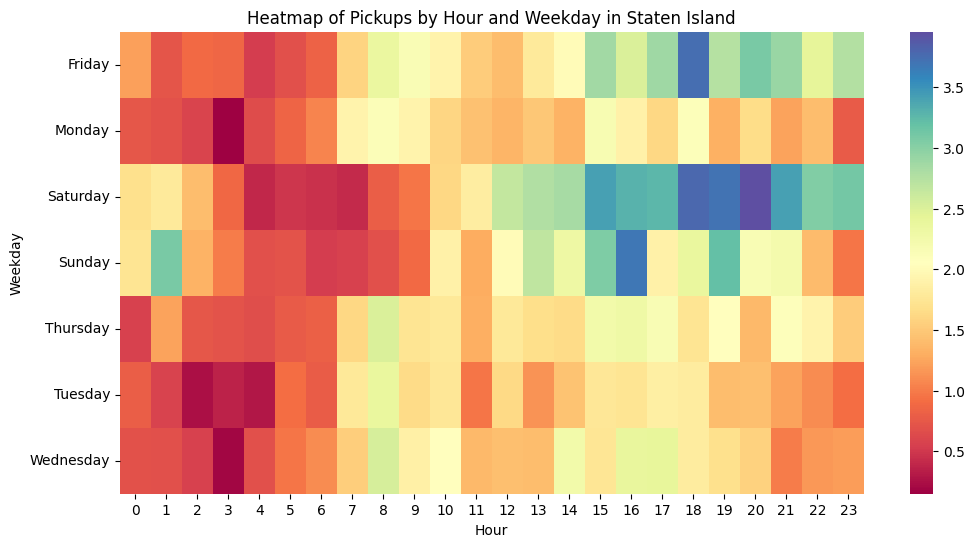

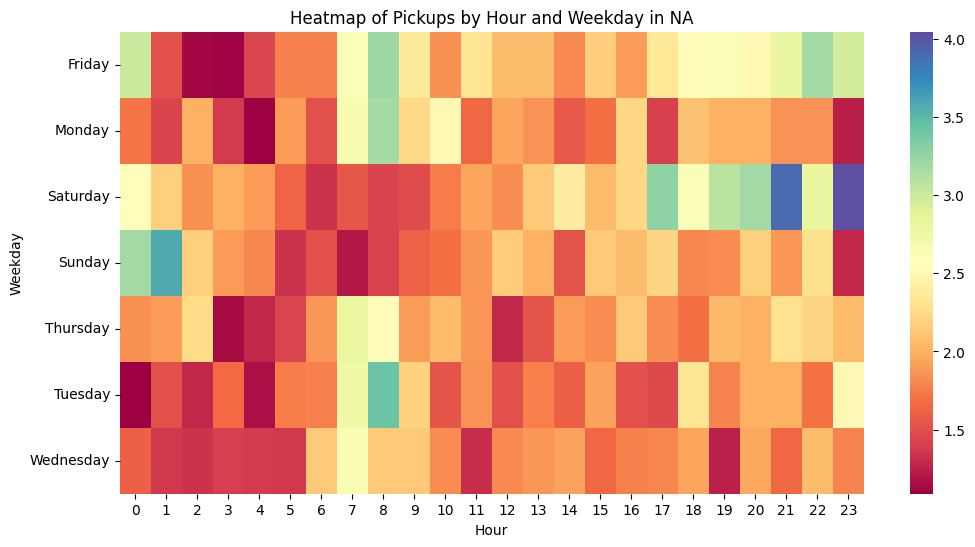

In [49]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format='%d/%m/%Y %H:%M')
df['weekdays'] = df['pickup_dt'].dt.strftime('%A')
df['hours'] = df['pickup_dt'].dt.hour

boroughs = df['borough'].unique()

for borough in boroughs:
    borough_data = df[df['borough'] == borough]
    heatmap_data = borough_data.pivot_table(index='weekdays', columns='hours', values='pickups')

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='Spectral')

    plt.xlabel('Hour')
    plt.ylabel('Weekday')
    plt.title(f'Heatmap of Pickups by Hour and Weekday in {borough}')

    plt.show()


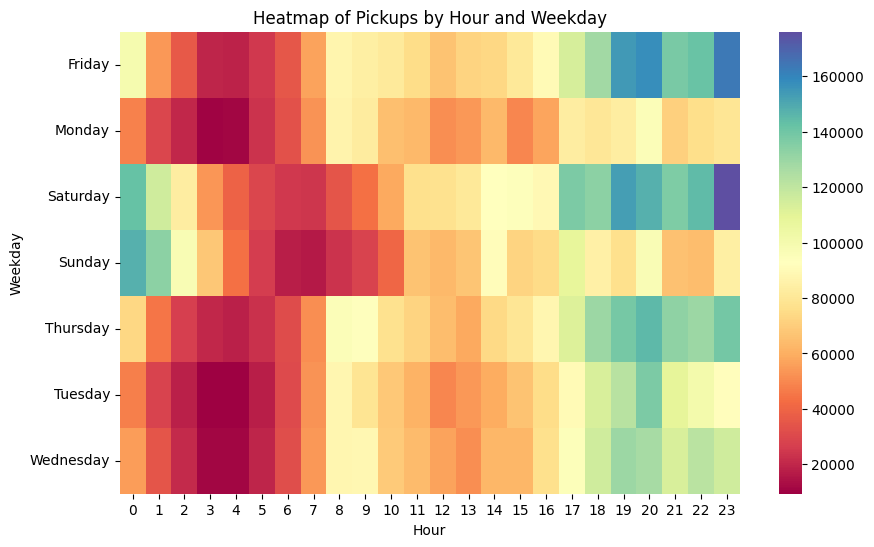

In [50]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format='%d/%m/%Y %H:%M')
df['weekdays'] = df['pickup_dt'].dt.strftime('%A')
df['hours'] = df['pickup_dt'].dt.hour
plt.figure(figsize=(10, 6))
sns.heatmap(data=df.pivot_table(index='weekdays', columns='hours', values='pickups', aggfunc='sum'), cmap='Spectral')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Pickups by Hour and Weekday')
plt.show()

Predictive analytics

We can see that the number of Ubers pick-up services in Manhattan is very large and accounts for more than 72% of the total number of rides of the districts in New York City.

=> From there, it is observed that the number of passengers, Uber pick-up service in Manhattan has a great influence on the total number of pick-up trips on New York City.